# Python データビジュアライゼーション入門

## Ch.05 さまざまなグラフ・チャートによるビジュアライゼーション

- Sec.10 縦棒グラフ
- Sec.11 横棒グラフ

In [ ]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline
import plotly.subplots
import seaborn as sns
import squarify
from IPython.display import display

### Sec.10 縦棒グラフ

- [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)

list5.28 性別ごとのtip額の平均値のデータ

In [ ]:
# データの読み込み
tips = sns.load_dataset("tips")

# 性別ごとにチップの平均額を算出する
tips_mean = tips.groupby("sex", as_index=False).mean(numeric_only=True)
display(tips_mean)

,sex,total_bill,tip,size
0,Male,20.744076,3.089618,2.630573
1,Female,18.056897,2.833448,2.459770


#### 縦棒グラフを描画する

list5.29 縦棒グラフの描画例1

<AxesSubplot: xlabel='sex', ylabel='tip'>

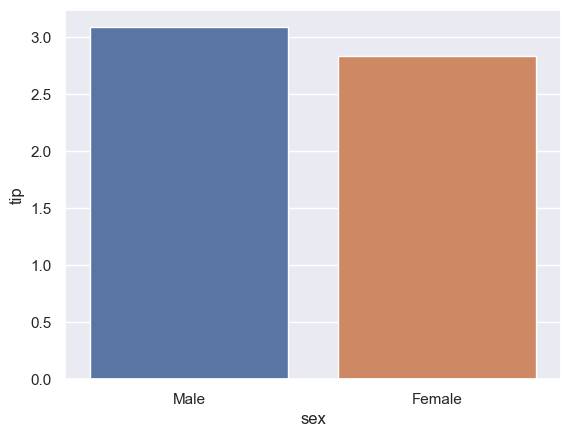

In [ ]:
sns.set_theme(style="darkgrid")
sns.barplot(data=tips_mean, x="sex", y="tip")

#### グラフの上に数値ラベルを表示する

-[matplotlib.pyplot.text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)

list5.30 縦棒グラフの描画例2

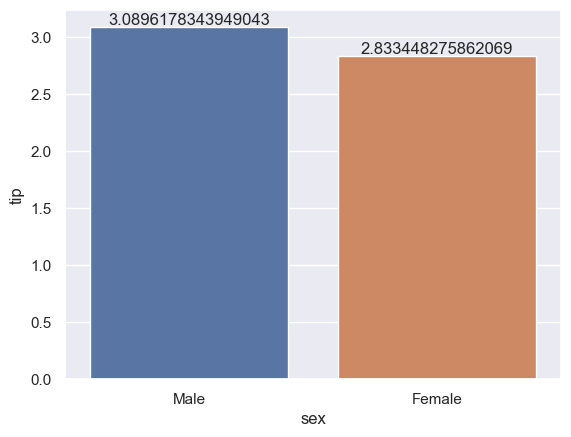

In [ ]:
# 性別ごとにチップの平均額を算出する
tips_mean = tips.groupby("sex", as_index=False).mean(numeric_only=True)

# 縦棒グラフとして表示
ax = sns.barplot(data=tips_mean, x="sex", y="tip")

# 数値を追加（任意の位置に任意の文字列を追加）
for index, row in tips_mean.iterrows():
    ax.text(x=index, y=row.tip, s=row.tip, ha="center", va="bottom")

#### 一定の数値に横棒を引く

- [matplotlib.pyplot.axhline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)

list5.31 縦棒グラフの描画例3

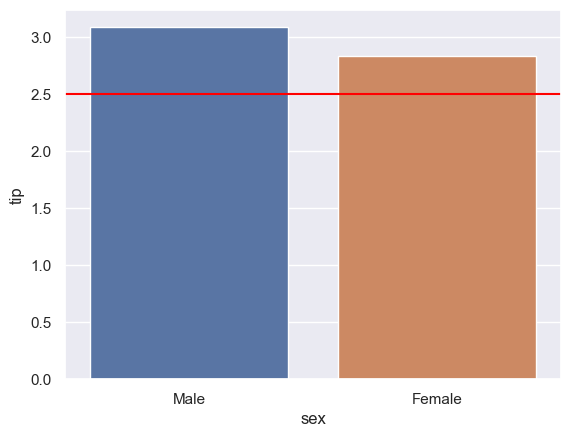

In [ ]:
# 性別ごとにチップの平均額を算出する
tips_mean = tips.groupby("sex", as_index=False).mean(numeric_only=True)

# 縦棒グラフとして表示
ax = sns.barplot(data=tips_mean, x="sex", y="tip")

# 数値（2.5）に横線を引く
ax.axhline(2.5, color="red")

#### 積み上げたて棒グラフを描画する

- [matplotlib.pyplot.subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)
- [matplotlib.pyplot.ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html)
- [matplotlib.legend](https://matplotlib.org/stable/api/legend_api.html)

list5.32 性別・時間帯ごとのチップ額の合計値のデータ

In [ ]:
# データの読み込み
tips = sns.load_dataset("tips")

# 性別・時間帯ごとにチップ額の合計値を算出
tips_cross = pd.crosstab(
    index=tips["sex"], columns=tips["time"], values=tips["tip"], aggfunc="sum"
)
display(tips_cross)

time,Lunch,Dinner
sex,,
Male,95.11,389.96
Female,90.40,156.11


list5.33 積み上げ縦棒グラフの描画例

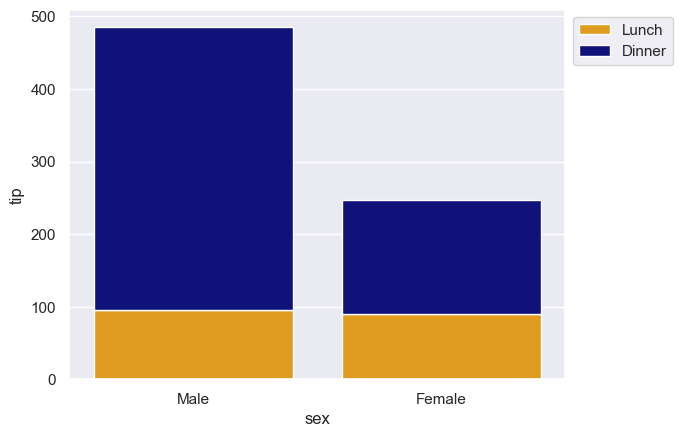

In [ ]:
# 積み上げ縦棒グラフを描画
f, ax = plt.subplots()
sns.barplot(x=tips_cross.index, y=tips_cross["Lunch"], color="orange", label="Lunch")
sns.barplot(
    x=tips_cross.index,
    y=tips_cross["Dinner"],
    color="darkblue",
    label="Dinner",
    bottom=tips_cross["Lunch"],
)
plt.ylabel("tip")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

#### 複数段の積み上げ縦棒グラフを描画する

list5.34 複数段の積み上げ縦棒グラフの描画例

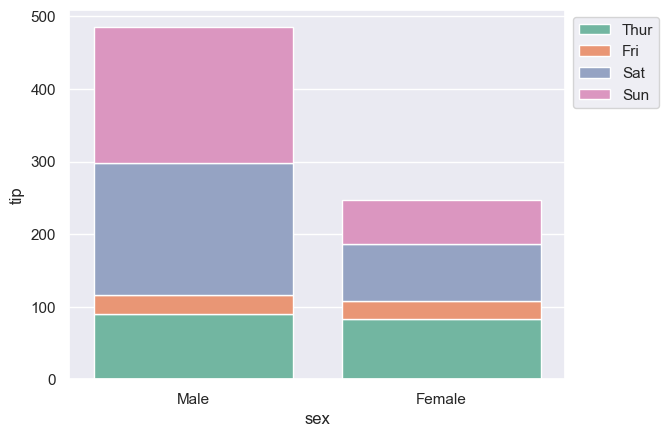

In [ ]:
# 性別・曜日ごとにチップ額を集計する
tips_sum = tips.groupby(["sex", "day"], as_index=False).sum(numeric_only=True)

# 複数段の積み上げ縦棒グラフを描画
f, ax = plt.subplots()
index = 0
palette = sns.color_palette("Set2")
bottom = np.zeros(len(tips_sum.sex.unique()))
for day in tips_sum.day.unique():
    sns.barplot(
        data=tips_sum[tips_sum.day == day],
        x="sex",
        y="tip",
        bottom=bottom,
        color=palette[index],
        label=day,
    )
    bottom += list(tips_sum[tips_sum.day == day]["tip"])
    index += 1
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

#### 100%積み上げ縦棒グラフを描画する

list5.35 100%積み上げ縦棒グラフに使用するデータセットを作成

In [ ]:
# 性別・時間帯ごとにチップ額の合計を行ごとに正規化したものを算出する
tips_cross_n = pd.crosstab(
    index=tips["sex"],
    columns=tips["time"],
    values=tips["tip"],
    aggfunc="sum",
    normalize="index",
)
display(tips_cross_n)

time,Lunch,Dinner
sex,,
Male,0.196075,0.803925
Female,0.366719,0.633281


list5.36 100%積み上げ縦棒グラフの描画例

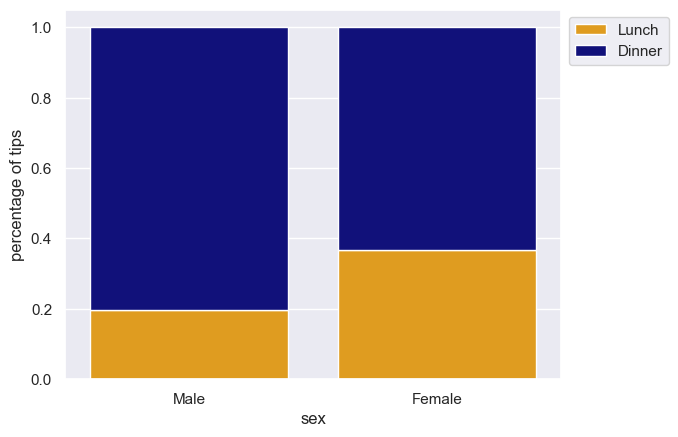

In [ ]:
# 100%積み上げ縦棒グラフを描画
f, ax = plt.subplots()
sns.barplot(
    x=tips_cross_n.index, y=tips_cross_n["Lunch"], color="orange", label="Lunch"
)
sns.barplot(
    x=tips_cross_n.index,
    y=tips_cross_n["Dinner"],
    color="darkblue",
    label="Dinner",
    bottom=tips_cross_n["Lunch"],
)
plt.ylabel("percentage of tips")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

#### 複数段の積み上げたて棒グラフを描画する（plotlyで積み上げたて棒グラフを描画する）

- [plotly/Bar Charts in Python](https://plotly.com/python/bar-charts/)

list5.37 複数段の積み上げたて棒グラフの描画例

In [ ]:
# 性別・曜日ごとにチップ額を集計する
tips_sum = tips.groupby(["sex", "day"], as_index=False).sum(numeric_only=True)

# 複数段の積み上げたて棒グラフを描画
px.bar(tips_sum, x="sex", y="tip", color="day", text="tip")

#### 複数の要素を並べて描画する

list5.38 複数の要素を並べて描画する例

In [ ]:
# 曜日ごとに各値の平均値を算出
tips_mean = tips.groupby("day", as_index=False).mean(numeric_only=True)

# size列を消去
tips_mean = tips_mean.drop("size", axis=1)
display(tips_mean)

,day,total_bill,tip
0,Thur,17.682742,2.771452
1,Fri,17.151579,2.734737
2,Sat,20.441379,2.993103
3,Sun,21.410000,3.255132


In [ ]:
# データフレームを整形
tips_mean = tips_mean.set_index("day")
display(tips_mean)

,total_bill,tip
day,,
Thur,17.682742,2.771452
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132


In [ ]:
display(tips_mean.stack())

day             
Thur  total_bill    17.682742
      tip            2.771452
Fri   total_bill    17.151579
      tip            2.734737
Sat   total_bill    20.441379
      tip            2.993103
Sun   total_bill    21.410000
      tip            3.255132
dtype: float64

In [ ]:
display(tips_mean.stack().rename_axis(["day", "type"]))

day   type      
Thur  total_bill    17.682742
      tip            2.771452
Fri   total_bill    17.151579
      tip            2.734737
Sat   total_bill    20.441379
      tip            2.993103
Sun   total_bill    21.410000
      tip            3.255132
dtype: float64

In [ ]:
display(tips_mean.stack().rename_axis(["day", "type"]).reset_index())

,day,type,0
0,Thur,total_bill,17.682742
1,Thur,tip,2.771452
2,Fri,total_bill,17.151579
3,Fri,tip,2.734737
4,Sat,total_bill,20.441379
5,Sat,tip,2.993103
6,Sun,total_bill,21.410000
7,Sun,tip,3.255132


In [ ]:
tips_mean = (
    tips_mean.stack()
    .rename_axis(["day", "type"])
    .reset_index()
    .rename(columns={0: "dollars"})
)
display(tips_mean)

,day,type,dollars
0,Thur,total_bill,17.682742
1,Thur,tip,2.771452
2,Fri,total_bill,17.151579
3,Fri,tip,2.734737
4,Sat,total_bill,20.441379
5,Sat,tip,2.993103
6,Sun,total_bill,21.410000
7,Sun,tip,3.255132


<AxesSubplot: xlabel='day', ylabel='dollars'>

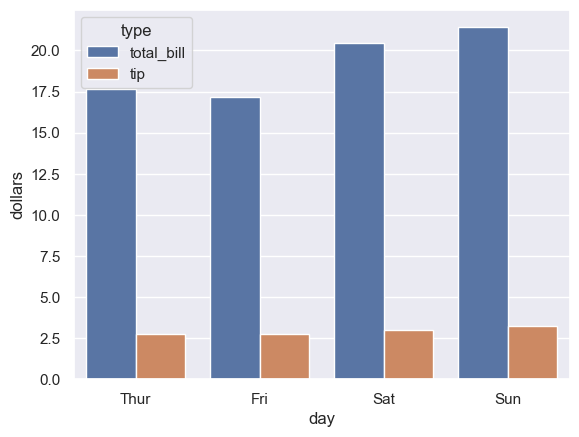

In [ ]:
sns.barplot(data=tips_mean, x="day", y="dollars", hue="type")

#### 複数の縦棒グラフをplotlyで描画する

list5.39 plotlyで複数の縦棒グラフを描画する例

In [ ]:
tips_mean = tips.groupby("day", as_index=False).mean(numeric_only=True)
display(tips_mean)

,day,total_bill,tip,size
0,Thur,17.682742,2.771452,2.451613
1,Fri,17.151579,2.734737,2.105263
2,Sat,20.441379,2.993103,2.517241
3,Sun,21.410000,3.255132,2.842105


In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name="total_bill", x=tips_mean["day"], y=tips_mean["total_bill"]),
        go.Bar(name="tips", x=tips_mean["day"], y=tips_mean["tip"]),
    ]
)
fig.update_layout(barmode="group")
fig.show()

#### 縦棒グラフの１つの色を変更する

- [seaborn.color_palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html)

list5.40 特定の縦棒グラフの色を変更する

<AxesSubplot: xlabel='day', ylabel='tip'>

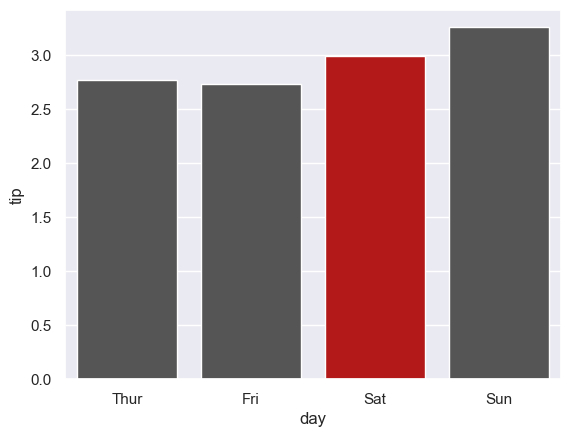

In [ ]:
# 曜日ごとにチップの平均額を算出する
tips_mean = tips.groupby("day", as_index=False).mean(numeric_only=True)

# 色の設定
# 標準の色
default_color = "#555555"
# 強調色
point_color = "#CC0000"
# 強調する縦棒グラフ
index = 2

# パレットの作成
palette = sns.color_palette(palette=[default_color], n_colors=len(tips_mean))
palette[index] = sns.color_palette(palette=[point_color])[0]

# 表示
sns.barplot(data=tips_mean, x="day", y="tip", palette=palette)

#### 積み上げたて棒グラフで特定の属性だけ色を変更して強調する

list5.41 特定の属性だけ色を変更して強調する

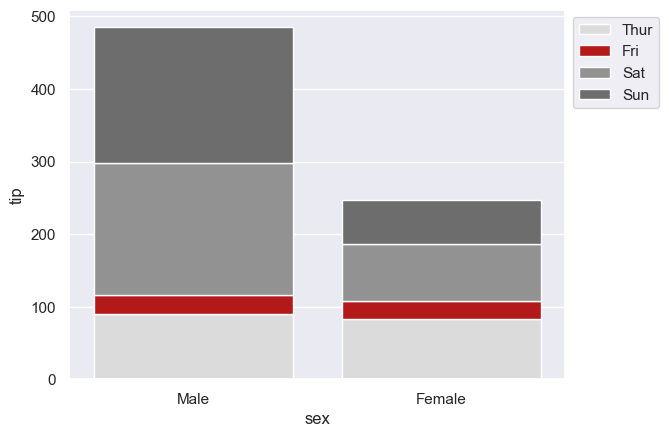

In [ ]:
# 性別・曜日ごとにチップ額を集計する
tips_sum = tips.groupby(["sex", "day"], as_index=False).sum(numeric_only=True)

# 色の設定
point_color = "#CC0000"

# パレット作成
default_palette = sns.color_palette("binary")

# 複数段の積み上げたて棒グラフの描画
f, ax = plt.subplots()
index = 0
bottom = np.zeros(len(tips_sum.sex.unique()))
for day in tips_sum.day.unique():
    if day == "Fri":
        color = point_color
    else:
        color = default_palette[index]
    index += 1
    sns.barplot(
        data=tips_sum[tips_sum.day == day],
        x="sex",
        y="tip",
        bottom=bottom,
        color=color,
        label=day,
    )
    bottom += list(tips_sum[tips_sum.day == day]["tip"])

ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

### Sec.11 横棒グラフ

- [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)

In [ ]:
# データの読み込み
tips = sns.load_dataset("tips")

# テーマ設定
sns.set_theme(style="darkgrid")

list5.42 横棒グラフの描画例

In [ ]:
# 性別ごとにチップの平均額を算出
tips_mean = tips.groupby("sex", as_index=False).mean(numeric_only=True)
tips_mean

,sex,total_bill,tip,size
0,Male,20.744076,3.089618,2.630573
1,Female,18.056897,2.833448,2.459770


<AxesSubplot: xlabel='tip', ylabel='sex'>

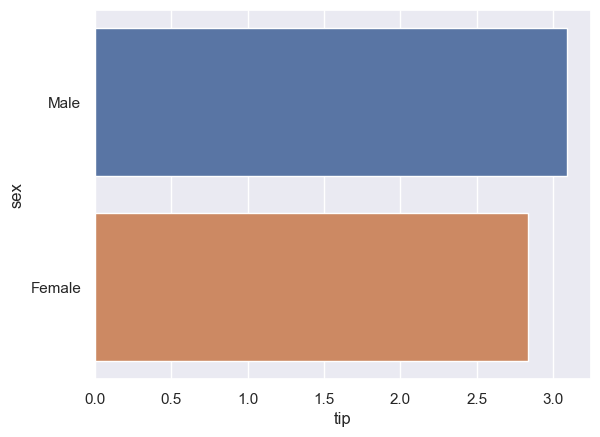

In [ ]:
# 横棒グラフを描画
sns.barplot(data=tips_mean, x="tip", y="sex")

#### 積み上げ横棒グラフを描画する

list5.43 積み上げ横棒グラフの描画例

In [ ]:
# 性別・時間帯ごとにチップ額の合計額を算出
tips_cross = pd.crosstab(
    index=tips["sex"], columns=tips["time"], values=tips["tip"], aggfunc="sum"
)
tips_cross

time,Lunch,Dinner
sex,,
Male,95.11,389.96
Female,90.40,156.11


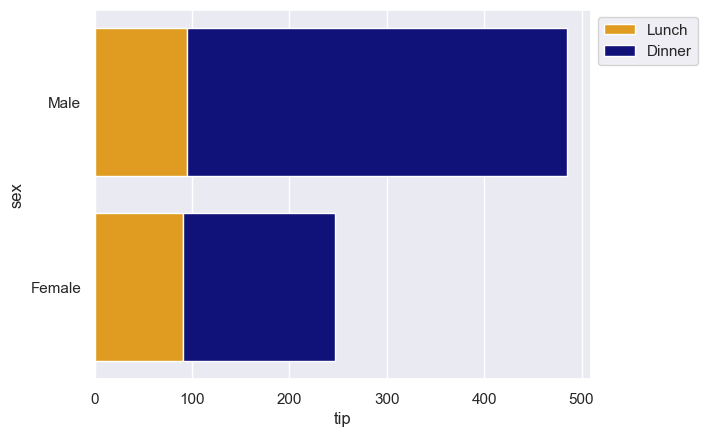

In [ ]:
# 積み上げ横棒グラフを描画
f, ax = plt.subplots()
sns.barplot(x=tips_cross["Lunch"], y=tips_cross.index, color="orange", label="Lunch")
sns.barplot(
    x=tips_cross["Dinner"],
    y=tips_cross.index,
    color="darkblue",
    label="Dinner",
    left=tips_cross["Lunch"],
)
plt.xlabel("tip")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

list5.44 ２つ以上の積み上げ横棒グラフの描画例

In [ ]:
# 性別・曜日ごとにチップ額を集計する
tips_sum = tips.groupby(["sex", "day"], as_index=False).sum(numeric_only=True)
tips_sum

,sex,day,total_bill,tip,size
0,Male,Thur,561.44,89.41,73
1,Male,Fri,198.57,26.93,21
2,Male,Sat,1227.35,181.95,156
3,Male,Sun,1269.46,186.78,163
4,Female,Thur,534.89,82.42,79
5,Female,Fri,127.31,25.03,19
6,Female,Sat,551.05,78.45,63
7,Female,Sun,357.70,60.61,53


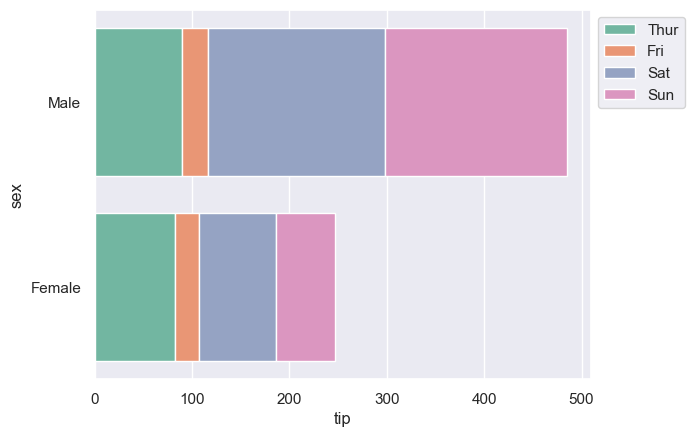

In [ ]:
# 複数段の積み上げ横棒グラフの描画
f, ax = plt.subplots()
index = 0
palette = sns.color_palette("Set2")
left = np.zeros(len(tips_sum.sex.unique()))
for day in tips_sum.day.unique():
    sns.barplot(
        data=tips_sum[tips_sum.day == day],
        x="tip",
        y="sex",
        color=palette[index],
        label=day,
        left=left,
    )
    left += list(tips_sum[tips_sum.day == day]["tip"])
    index += 1
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

#### 100%積み上げ横棒グラフを描画する

list5.45 ２つ以上の積み上げ横棒グラフの描画例

In [ ]:
# 性別・時間帯ごとにチップ額の合計を行ごとに正規化したものを算出
tips_cross = pd.crosstab(
    index=tips["sex"],
    columns=tips["time"],
    values=tips["tip"],
    aggfunc="sum",
    normalize="index",
)
tips_cross

time,Lunch,Dinner
sex,,
Male,0.196075,0.803925
Female,0.366719,0.633281


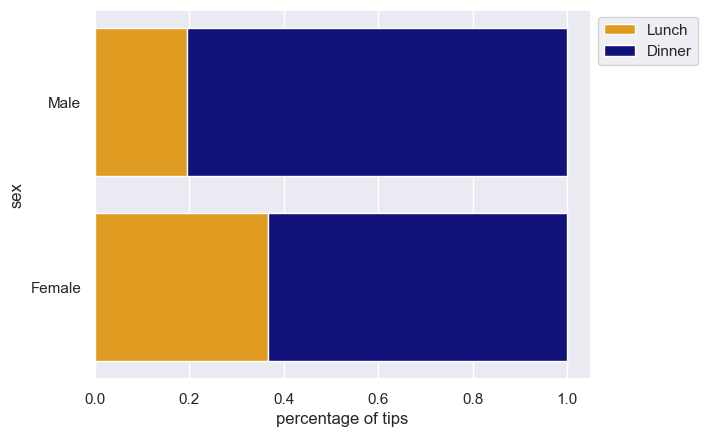

In [ ]:
# 積み上げ横棒グラフを描画
f, ax = plt.subplots()
sns.barplot(x=tips_cross["Lunch"], y=tips_cross.index, color="orange", label="Lunch")
sns.barplot(
    x=tips_cross["Dinner"],
    y=tips_cross.index,
    color="darkblue",
    label="Dinner",
    left=tips_cross["Lunch"],
)
plt.xlabel("percentage of tips")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

#### 凡例の表示位置

グラフの凡例を外側に表示する（右上に表示）

list5.46 グラフの凡例を外側に表示する例

In [ ]:
# 曜日ごとに各値の平均を算出
tips_mean = tips.groupby("day", as_index=False).mean(numeric_only=True)
tips_mean

,day,total_bill,tip,size
0,Thur,17.682742,2.771452,2.451613
1,Fri,17.151579,2.734737,2.105263
2,Sat,20.441379,2.993103,2.517241
3,Sun,21.410000,3.255132,2.842105


In [ ]:
# size列の削除
tips_mean = tips_mean.drop("size", axis=1)
tips_mean

,day,total_bill,tip
0,Thur,17.682742,2.771452
1,Fri,17.151579,2.734737
2,Sat,20.441379,2.993103
3,Sun,21.410000,3.255132


In [ ]:
# データフレームを整形
tips_mean = tips_mean.set_index("day")
tips_mean

,total_bill,tip
day,,
Thur,17.682742,2.771452
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132


In [ ]:
tips_mean.stack()

day             
Thur  total_bill    17.682742
      tip            2.771452
Fri   total_bill    17.151579
      tip            2.734737
Sat   total_bill    20.441379
      tip            2.993103
Sun   total_bill    21.410000
      tip            3.255132
dtype: float64

In [ ]:
tips_mean.stack().rename_axis(["day", "type"])

day   type      
Thur  total_bill    17.682742
      tip            2.771452
Fri   total_bill    17.151579
      tip            2.734737
Sat   total_bill    20.441379
      tip            2.993103
Sun   total_bill    21.410000
      tip            3.255132
dtype: float64

In [ ]:
tips_mean.stack().rename_axis(["day", "type"]).reset_index()

,day,type,0
0,Thur,total_bill,17.682742
1,Thur,tip,2.771452
2,Fri,total_bill,17.151579
3,Fri,tip,2.734737
4,Sat,total_bill,20.441379
5,Sat,tip,2.993103
6,Sun,total_bill,21.410000
7,Sun,tip,3.255132


In [ ]:
tips_mean = (
    tips_mean.stack()
    .rename_axis(["day", "type"])
    .reset_index()
    .rename(columns={0: "dollars"})
)
tips_mean

,day,type,dollars
0,Thur,total_bill,17.682742
1,Thur,tip,2.771452
2,Fri,total_bill,17.151579
3,Fri,tip,2.734737
4,Sat,total_bill,20.441379
5,Sat,tip,2.993103
6,Sun,total_bill,21.410000
7,Sun,tip,3.255132


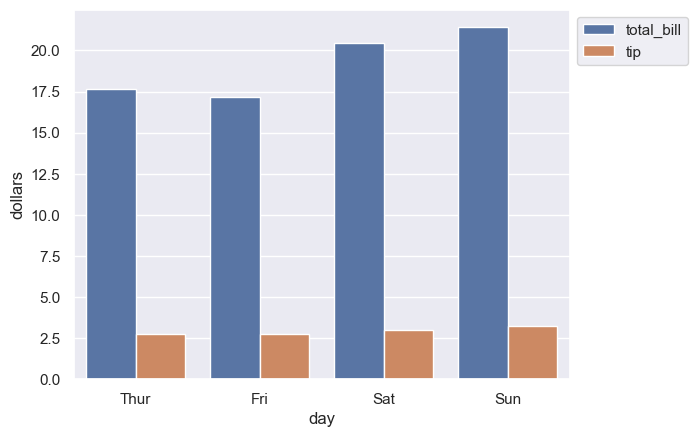

In [ ]:
# グラフの描画
ax = sns.barplot(data=tips_mean, x="day", y="dollars", hue="type")
# 凡例を右上に表示
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

グラフの凡例を外側に表示する（右下に表示）

list5.47 グラフの凡例を右下に表示する例

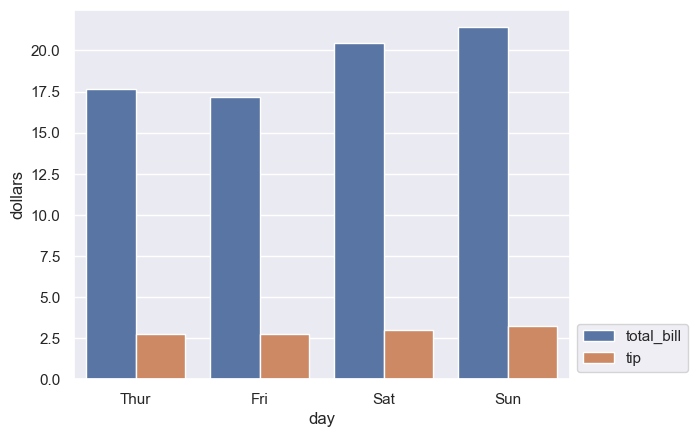

In [ ]:
# グラフの描画
ax = sns.barplot(data=tips_mean, x="day", y="dollars", hue="type")
# 凡例を右下に表示
ax.legend(loc="lower left", bbox_to_anchor=(1, 0))

グラフの凡例を外側に表示する（中央下に表示）

list5.48 グラフの凡例を中央下に表示する例

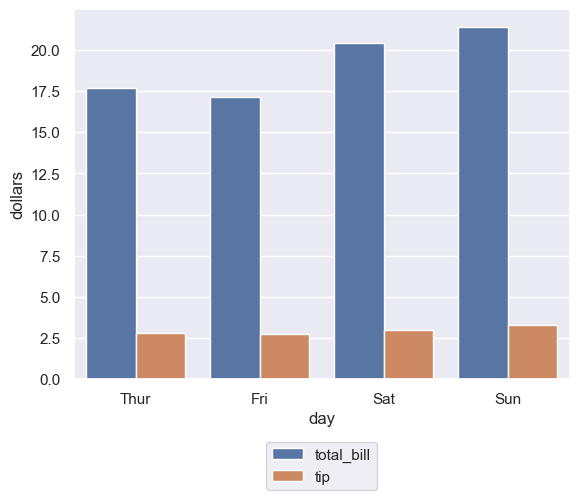

In [ ]:
# グラフの描画
ax = sns.barplot(data=tips_mean, x="day", y="dollars", hue="type")
# 凡例を中央下に表示
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15))

複数のグラフを並べる（グラフの分割）

list5.49 複数のグラフを並べる（グラフ分割）例

<AxesSubplot: >

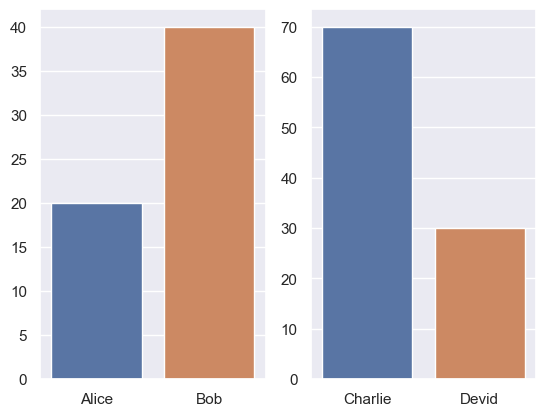

In [ ]:
labels1 = ["Alice", "Bob"]
y1 = [20, 40]

labels2 = ["Charlie", "Devid"]
y2 = [70, 30]

f, axs = plt.subplots(1, 2)
sns.barplot(x=labels1, y=y1, ax=axs[0])
sns.barplot(x=labels2, y=y2, ax=axs[1])

pandasデータフレームで積み上げ縦棒グラフを描画する

list5.50 pandasデータフレームで積み上げ縦棒グラフの描画例

In [ ]:
titanic = sns.load_dataset("titanic")
df = pd.crosstab(index=titanic["class"], columns=titanic["sex"])
df

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


<AxesSubplot: xlabel='class'>

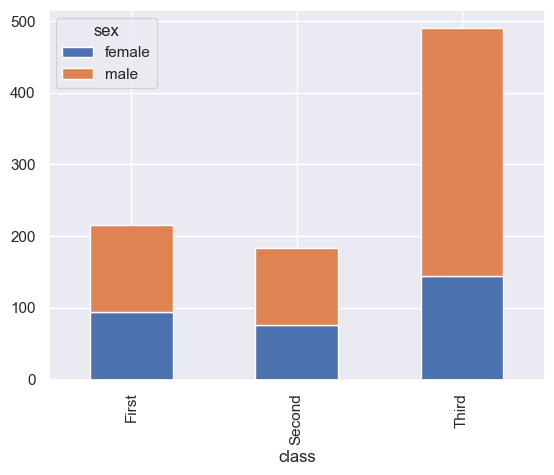

In [ ]:
df.plot.bar(stacked=True)

pandasデータフレームで100%積み上げ縦棒グラフを描画する

list5.51 pandasデータフレームで100%積み上げ縦棒グラフの描画例

In [ ]:
df2 = pd.crosstab(index=titanic["class"], columns=titanic["sex"], normalize="index")
df2

sex,female,male
class,,
First,0.435185,0.564815
Second,0.413043,0.586957
Third,0.293279,0.706721


<AxesSubplot: xlabel='class'>

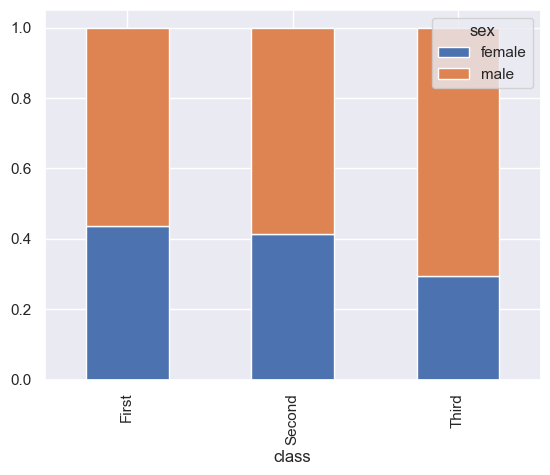

In [ ]:
df2.plot.bar(stacked=True)

pandasデータフレームで積み上げ横棒グラフを描画する

list5.52 pandasデータフレームで積み上げ横棒グラフの描画例

<AxesSubplot: ylabel='class'>

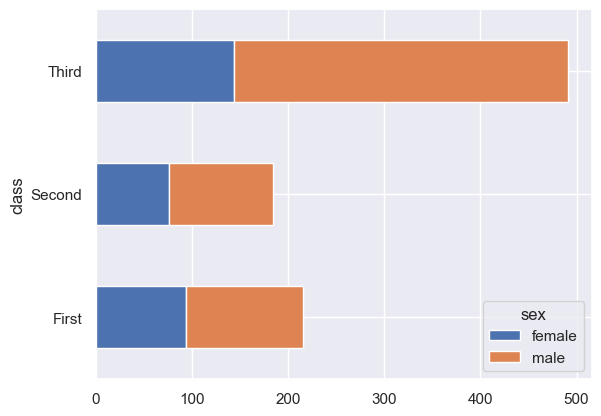

In [ ]:
df.plot.barh(stacked=True)

pandasデータフレームで100%積み上げ横棒グラフを描画する

list5.53 pandasデータフレームで100%積み上げ横棒グラフの描画例

<AxesSubplot: ylabel='class'>

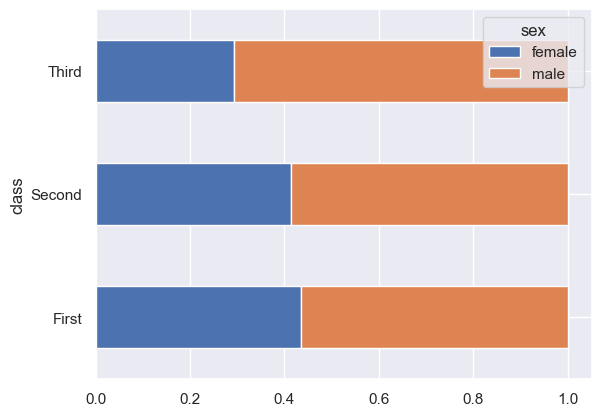

In [ ]:
df2.plot.barh(stacked=True)